### Урок 6 (2020) https://geo-python-site.readthedocs.io/en/latest/lessons/L6/overview.html
##### GITHUB
https://github.com/Geo-Python-2020/Exercise-6

In [1]:
import os
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt # построение графиков

%matplotlib inline

Цель этого упражнения - проанализировать исторические данные о погоде. 
- В задаче 1 Вы читаете файл с данными и исследуете его содержимое. 
- В задаче 2 вы преобразуете и агрегируете данные от дневной температуры в градусах Фаренгейта до среднемесячной температуры в градусах Цельсия. 
- В задаче 3 Вы, наконец, проанализируете погодные аномалии, сравнив среднемесячные температуры с долгосрочными средними.

In [2]:
# Текущая директория
ROOT_PATH = os.path.abspath(os.curdir)

In [3]:
# Для колонок:
pd.set_option('display.max_columns', None)
# Для строк:
pd.set_option('display.max_rows', 10)

### Чтение в файле данных

In [4]:
# чтение данных
fd = os.path.join(ROOT_PATH, r"data\1091402.txt")
# считывает данные, используя различное количество пробелов в качестве разделителя
# отбросим первую строку содержащую "----", заменим -9999 на NaN

df = pd.read_csv(fd, delim_whitespace=True, skiprows=[1], na_values=[-9999]) 
df.head()

,STATION,ELEVATION,LATITUDE,LONGITUDE,DATE,PRCP,TAVG,TMAX,TMIN
0,GHCND:FIE00142080,51,60.3269,24.9603,19520101,0.31,37.0,39.0,34.0
1,GHCND:FIE00142080,51,60.3269,24.9603,19520102,NaN,35.0,37.0,34.0
2,GHCND:FIE00142080,51,60.3269,24.9603,19520103,0.14,33.0,36.0,NaN
3,GHCND:FIE00142080,51,60.3269,24.9603,19520104,0.05,29.0,30.0,25.0
4,GHCND:FIE00142080,51,60.3269,24.9603,19520105,0.06,27.0,30.0,25.0


##### Входные данные:
Для задач 1-3 в этом упражнении мы будем использовать исторические климатические данные 
со станции аэропорта Хельсинки-Вантаа. Для решения этих проблем у нас есть ежедневные наблюдения, 
полученные из глобальной исторической климатологической сети NOAA. 
Файл был загружен с использованием выходного формата "Custom GHCN-Daily Text", включая следующие атрибуты:



|Атрибут|Описание|
|-------|:-------|
|STATION|Уникальный идентификатор метеостанции|
| ELEVATION|Возвышение станции|
|LATITUDE , LONGITUDE|Координаты станции|
|DATE|Дата измерения|
|PRCP|Осадки|
|TAVG|Средняя температура|
|TMAX|Максимальная температура|
|TMIN|Минимальная температура|

##### Примечание: температуры в этом наборе данных задаются в градусах Фаренгейта.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23716 entries, 0 to 23715
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    23716 non-null  object 
 1   ELEVATION  23716 non-null  int64  
 2   LATITUDE   23716 non-null  float64
 3   LONGITUDE  23716 non-null  float64
 4   DATE       23716 non-null  int64  
 5   PRCP       22163 non-null  float64
 6   TAVG       20408 non-null  float64
 7   TMAX       23456 non-null  float64
 8   TMIN       23351 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.6+ MB


##### Значений NaN ЕСТЬ в последни 4х колонках

<AxesSubplot:ylabel='Frequency'>

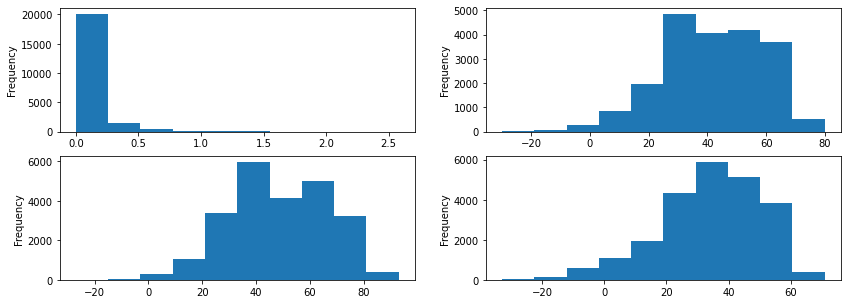

In [6]:
# 1. объект figure
fig = plt.figure(figsize=(14,5))
# 2. несколько графиков. 221 - 1 график в матрице 2 х 2 (4 графика)
ax1 = fig.add_subplot(221)
df['PRCP'].plot.hist(bins=10)
ax2 = fig.add_subplot(222)
df['TAVG'].plot.hist(bins=10)
ax3 = fig.add_subplot(223)
df['TMAX'].plot.hist(bins=10)
ax4 = fig.add_subplot(224)
df['TMIN'].plot.hist(bins=10)

##### выбросов нет - -9999 замена на NaN

In [7]:
# просмотр общей информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23716 entries, 0 to 23715
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    23716 non-null  object 
 1   ELEVATION  23716 non-null  int64  
 2   LATITUDE   23716 non-null  float64
 3   LONGITUDE  23716 non-null  float64
 4   DATE       23716 non-null  int64  
 5   PRCP       22163 non-null  float64
 6   TAVG       20408 non-null  float64
 7   TMAX       23456 non-null  float64
 8   TMIN       23351 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.6+ MB


In [8]:
# всего записей (строк)
# Вычислите общее количество дней, охватываемых этим файлом данных
# Присвойте свой ответ переменной day_count
day_count = len(df['PRCP'])
print("Всего записей в Data Frame:", day_count)

Всего записей в Data Frame: 23716


In [9]:
# всего Non-null записей (элементов)
# Подсчитать, сколько без данных (NaN) значения находятся в столбце PRCP
# Назначить ваш ответ в переменную с названием prcp_nodata_count.
prcp_nodata_count = df["PRCP"].count()
print("Количество значений Non-Null в колонке 'Осадки':",prcp_nodata_count)

Количество значений Non-Null в колонке 'Осадки': 22163


In [10]:
# сколько нvalue_countsданных
df1 = df['PRCP'].filter(df['PRCP'] != None)
df1.head()

True   NaN
True   NaN
True   NaN
True   NaN
True   NaN
Name: PRCP, dtype: float64

In [11]:
df["YEAR_MONTH_DAY"] = pd.to_datetime(df["DATE"], format='%Y%m', exact=False)

In [12]:
df

,STATION,ELEVATION,LATITUDE,LONGITUDE,DATE,PRCP,TAVG,TMAX,TMIN,YEAR_MONTH_DAY
0,GHCND:FIE00142080,51,60.3269,24.9603,19520101,0.31,37.0,39.0,34.0,1952-01-01
1,GHCND:FIE00142080,51,60.3269,24.9603,19520102,NaN,35.0,37.0,34.0,1952-01-01
2,GHCND:FIE00142080,51,60.3269,24.9603,19520103,0.14,33.0,36.0,NaN,1952-01-01
3,GHCND:FIE00142080,51,60.3269,24.9603,19520104,0.05,29.0,30.0,25.0,1952-01-01
4,GHCND:FIE00142080,51,60.3269,24.9603,19520105,0.06,27.0,30.0,25.0,1952-01-01
...,...,...,...,...,...,...,...,...,...,...
23711,GHCND:FIE00142080,51,60.3269,24.9603,20170930,NaN,47.0,49.0,44.0,2017-09-01
23712,GHCND:FIE00142080,51,60.3269,24.9603,20171001,0.04,47.0,48.0,45.0,2017-10-01
23713,GHCND:FIE00142080,51,60.3269,24.9603,20171002,NaN,47.0,49.0,46.0,2017-10-01
23714,GHCND:FIE00142080,51,60.3269,24.9603,20171003,0.94,47.0,NaN,44.0,2017-10-01


In [13]:
# Найдите дату самого старого (первого) наблюдения
# Присвойте свой ответ переменной first_obs
first_obs = df.YEAR_MONTH_DAY.min()
print('Первое наблюдение":', first_obs)

Первое наблюдение": 1952-01-01 00:00:00


In [14]:
# Найдите дату самого старого (первого) наблюдения
# Присвойте свой ответ переменной first_obs
last_obs = df.YEAR_MONTH_DAY.max()
print('Последнее наблюдение":', last_obs)

Последнее наблюдение": 2017-10-01 00:00:00


In [15]:
# Найдите среднюю температуру для всего файла данных (все наблюдения) из столбца TAVG
# Присвойте свой ответ переменной avg_temp
avg_temp = df.TAVG.mean()
print('Средняя температура (F):', round(avg_temp, 2))

Средняя температура (F): 41.32


In [16]:
# Найдите среднюю температуру TMAX за лето 1969 года (месяцы май, июнь, июль и август 1969 года)
# Присвойте свой ответ переменной avg_temp_1969

In [17]:
df_1969 = df[(df["DATE"] >= 19690501) & (df["DATE"] < 19690901)]
# df_1969.describe()
avg_temp_1969 = df_1969.TMAX.mean()
print("Средняя максимальная температура (F) с мая по август 1969г:", round(avg_temp_1969, 2))

Средняя максимальная температура (F) с мая по август 1969г: 67.82


### Расчет среднемесячных температур
Для этой задачи ваша цель состоит в том, чтобы вычислить среднемесячные температуры в градусах Цельсия из ежедневных значений Фаренгейта, которые мы имеем в файле данных. Можно продолжить работу с тем же фреймом данных, который использовался в задаче 1.

Вычисление среднемесячных температур в градусах Цельсия для каждого месяца в наборе данных (т. е. для каждого месяца каждого года)
Вы должны хранить среднемесячные температуры в новом фрейме данных Pandas с именем monthly_data.
monthly_data должен содержать новый столбец temp_celsius среднемесячные температуры в градусах Цельсия
Преобразуйте значения TAVG в градусах Фаренгейта в градус Цельсия и сохраните выходные данные в temp_celsius

In [18]:
# 1 - функция преобразования F в С
def fahr_to_celsius(temp_fahrenheit):
    """
    Функция для преобразования температуры по Фаренгейту В градус Цельсия.
    parameters
    ----------
    temp_fahrenheit: int | float -
    ввод температуры в градусах Фаренгейта (должно быть число)

    returns
    -------
    температура в градусах Цельсия (поплавок)
    """

    # преобразовать Фаренгейта в Цельсия и вернуть его
    converted_temp = (temp_fahrenheit - 32) / 1.8
    return converted_temp

In [19]:
# 2 - выделяем из даты год и месяц
print("Тип данных в колонке 'DATE':", df["DATE"].dtypes)
# преобразуем значения int в str
df['TIME_STR'] = pd.to_datetime(df['DATE'].astype(str))
df['YEAR'] = df['TIME_STR'].dt.year
df['MONTH'] = df['TIME_STR'].dt.month
df.head()

Тип данных в колонке 'DATE': int64


,STATION,ELEVATION,LATITUDE,LONGITUDE,DATE,PRCP,TAVG,TMAX,TMIN,YEAR_MONTH_DAY,TIME_STR,YEAR,MONTH
0,GHCND:FIE00142080,51,60.3269,24.9603,19520101,0.31,37.0,39.0,34.0,1952-01-01,1952-01-01,1952,1
1,GHCND:FIE00142080,51,60.3269,24.9603,19520102,NaN,35.0,37.0,34.0,1952-01-01,1952-01-02,1952,1
2,GHCND:FIE00142080,51,60.3269,24.9603,19520103,0.14,33.0,36.0,NaN,1952-01-01,1952-01-03,1952,1
3,GHCND:FIE00142080,51,60.3269,24.9603,19520104,0.05,29.0,30.0,25.0,1952-01-01,1952-01-04,1952,1
4,GHCND:FIE00142080,51,60.3269,24.9603,19520105,0.06,27.0,30.0,25.0,1952-01-01,1952-01-05,1952,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23716 entries, 0 to 23715
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   STATION         23716 non-null  object        
 1   ELEVATION       23716 non-null  int64         
 2   LATITUDE        23716 non-null  float64       
 3   LONGITUDE       23716 non-null  float64       
 4   DATE            23716 non-null  int64         
 5   PRCP            22163 non-null  float64       
 6   TAVG            20408 non-null  float64       
 7   TMAX            23456 non-null  float64       
 8   TMIN            23351 non-null  float64       
 9   YEAR_MONTH_DAY  23716 non-null  datetime64[ns]
 10  TIME_STR        23716 non-null  datetime64[ns]
 11  YEAR            23716 non-null  int64         
 12  MONTH           23716 non-null  int64         
dtypes: datetime64[ns](2), float64(6), int64(4), object(1)
memory usage: 2.4+ MB


In [21]:
# Преобразование средней температуры из F в C
df['TEMP_C'] = df['TAVG'].apply(fahr_to_celsius)
df

,STATION,ELEVATION,LATITUDE,LONGITUDE,DATE,PRCP,TAVG,TMAX,TMIN,YEAR_MONTH_DAY,TIME_STR,YEAR,MONTH,TEMP_C
0,GHCND:FIE00142080,51,60.3269,24.9603,19520101,0.31,37.0,39.0,34.0,1952-01-01,1952-01-01,1952,1,2.777778
1,GHCND:FIE00142080,51,60.3269,24.9603,19520102,NaN,35.0,37.0,34.0,1952-01-01,1952-01-02,1952,1,1.666667
2,GHCND:FIE00142080,51,60.3269,24.9603,19520103,0.14,33.0,36.0,NaN,1952-01-01,1952-01-03,1952,1,0.555556
3,GHCND:FIE00142080,51,60.3269,24.9603,19520104,0.05,29.0,30.0,25.0,1952-01-01,1952-01-04,1952,1,-1.666667
4,GHCND:FIE00142080,51,60.3269,24.9603,19520105,0.06,27.0,30.0,25.0,1952-01-01,1952-01-05,1952,1,-2.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23711,GHCND:FIE00142080,51,60.3269,24.9603,20170930,NaN,47.0,49.0,44.0,2017-09-01,2017-09-30,2017,9,8.333333
23712,GHCND:FIE00142080,51,60.3269,24.9603,20171001,0.04,47.0,48.0,45.0,2017-10-01,2017-10-01,2017,10,8.333333
23713,GHCND:FIE00142080,51,60.3269,24.9603,20171002,NaN,47.0,49.0,46.0,2017-10-01,2017-10-02,2017,10,8.333333
23714,GHCND:FIE00142080,51,60.3269,24.9603,20171003,0.94,47.0,NaN,44.0,2017-10-01,2017-10-03,2017,10,8.333333


In [22]:
# # Преобразовать "DATE" в строку
# df["YEAR_MONTH"] = pd.to_datetime(df["DATE"], format='%Y%m', exact=False)
# df.head

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23716 entries, 0 to 23715
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   STATION         23716 non-null  object        
 1   ELEVATION       23716 non-null  int64         
 2   LATITUDE        23716 non-null  float64       
 3   LONGITUDE       23716 non-null  float64       
 4   DATE            23716 non-null  int64         
 5   PRCP            22163 non-null  float64       
 6   TAVG            20408 non-null  float64       
 7   TMAX            23456 non-null  float64       
 8   TMIN            23351 non-null  float64       
 9   YEAR_MONTH_DAY  23716 non-null  datetime64[ns]
 10  TIME_STR        23716 non-null  datetime64[ns]
 11  YEAR            23716 non-null  int64         
 12  MONTH           23716 non-null  int64         
 13  TEMP_C          20408 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(4), object(1)


In [44]:
# группировка по году и месяцу
grouped = df.groupby(["YEAR", "MONTH"])

# Что это за тип?
print("Type:\n", type(grouped))

# сколько?
print("длина:\n", len(grouped))

Type:
 pandas.core.groupby.generic.DataFrameGroupBy
длина:
 790


In [47]:
# длина сгруппированного объекта должна совпадать с
df["YEAR_MONTH_DAY"].nunique()

790

In [46]:
# Перебираем группы
for key, group in grouped:
    # Print key и group
    print("Key:\n", key) # год и месяц Н-р: (1906, 1)
    print("\n Первая строка данных в этой группе:\n", group.head())
    print(len(group))
    print(type(group))
    # остановить итерацию с помощью команды break
    break

Key:
 (1952, 1)

 Первая строка данных в этой группе:
              STATION  ELEVATION  LATITUDE  LONGITUDE      DATE  PRCP  TAVG  \
0  GHCND:FIE00142080         51   60.3269    24.9603  19520101  0.31  37.0   
1  GHCND:FIE00142080         51   60.3269    24.9603  19520102   NaN  35.0   
2  GHCND:FIE00142080         51   60.3269    24.9603  19520103  0.14  33.0   
3  GHCND:FIE00142080         51   60.3269    24.9603  19520104  0.05  29.0   
4  GHCND:FIE00142080         51   60.3269    24.9603  19520105  0.06  27.0   

   TMAX  TMIN YEAR_MONTH_DAY   TIME_STR  YEAR  MONTH    TEMP_C  
0  39.0  34.0     1952-01-01 1952-01-01  1952      1  2.777778  
1  37.0  34.0     1952-01-01 1952-01-02  1952      1  1.666667  
2  36.0   NaN     1952-01-01 1952-01-03  1952      1  0.555556  
3  30.0  25.0     1952-01-01 1952-01-04  1952      1 -1.666667  
4  30.0  25.0     1952-01-01 1952-01-05  1952      1 -2.777778  
23
<class 'pandas.core.frame.DataFrame'>


In [27]:
# Проверьте "имена" каждой группы 
grouped.groups.keys()

dict_keys([(1952, 1), (1952, 2), (1952, 3), (1952, 4), (1952, 5), (1952, 6), (1952, 7), (1952, 8), (1952, 9), (1952, 10), (1952, 11), (1952, 12), (1953, 1), (1953, 2), (1953, 3), (1953, 4), (1953, 5), (1953, 6), (1953, 7), (1953, 8), (1953, 9), (1953, 10), (1953, 11), (1953, 12), (1954, 1), (1954, 2), (1954, 3), (1954, 4), (1954, 5), (1954, 6), (1954, 7), (1954, 8), (1954, 9), (1954, 10), (1954, 11), (1954, 12), (1955, 1), (1955, 2), (1955, 3), (1955, 4), (1955, 5), (1955, 6), (1955, 7), (1955, 8), (1955, 9), (1955, 10), (1955, 11), (1955, 12), (1956, 1), (1956, 2), (1956, 3), (1956, 4), (1956, 5), (1956, 6), (1956, 7), (1956, 8), (1956, 9), (1956, 10), (1956, 11), (1956, 12), (1957, 1), (1957, 2), (1957, 3), (1957, 4), (1957, 5), (1957, 6), (1957, 7), (1957, 8), (1957, 9), (1957, 10), (1957, 11), (1957, 12), (1958, 1), (1958, 2), (1958, 3), (1958, 4), (1958, 5), (1958, 6), (1958, 7), (1958, 8), (1958, 9), (1958, 10), (1958, 11), (1958, 12), (1959, 1), (1959, 2), (1959, 3), (1959, 4), 

In [28]:
# столбцы, которые мы хотим агрегировать
mean_cols = ['PRCP', 'TAVG', 'TMAX', 'TMIN', 'TEMP_C', 'MONTH', 'YEAR']

# Создайте пустой фрейм данных для агрегированных значений средней температуры
monthly_data = pd.DataFrame([], columns=mean_cols)

In [29]:
monthly_data.head

<bound method NDFrame.head of Empty DataFrame
Columns: [PRCP, TAVG, TMAX, TMIN, TEMP_C, MONTH, YEAR]
Index: []>

In [30]:
# перебираем группы
for key, group in grouped:
    # вычисляем среднее значение
    mean_values = group[mean_cols].mean()
#     print(mean_values.dtype)
    # добавьте ключ (т. е. информацию о дате и времени) в агрегированные значения
    mean_values['YEAR_MONTH'] = key
#     print(key)
    # добавьте агрегированные значения в фрейм данных monthly_data
    monthly_data = monthly_data.append(mean_values, ignore_index=True)
#     break

monthly_data.head

<bound method NDFrame.head of          PRCP       TAVG       TMAX       TMIN     TEMP_C  MONTH    YEAR  \
0    0.174545  29.478261  33.263158  27.545455  -1.400966    1.0  1952.0   
1    0.090769  24.800000  29.142857  17.761905  -4.000000    2.0  1952.0   
2    0.134545  13.807692  26.045455  -0.625000 -10.106838    3.0  1952.0   
3    0.102500  39.607143  49.920000  29.884615   4.226190    4.0  1952.0   
4    0.188333  44.666667  53.304348  33.916667   7.037037    5.0  1952.0   
..        ...        ...        ...        ...        ...    ...     ...   
785  0.129333  56.300000  65.533333  48.566667  13.500000    6.0  2017.0   
786  0.041935  60.290323  69.709677  52.516129  15.716846    7.0  2017.0   
787  0.090323  60.290323  68.064516  53.774194  15.716846    8.0  2017.0   
788       NaN  52.333333  58.850000  47.625000  11.296296    9.0  2017.0   
789  0.496667  48.250000  51.000000  45.000000   9.027778   10.0  2017.0   

     YEAR_MONTH  
0     (1952, 1)  
1     (1952, 2)  
2  

In [31]:
# длинна dataframe
print(len(monthly_data))

790


In [32]:
print("Средняя температура (С):", round(monthly_data.TEMP_C.mean(), 2))

Средняя температура (С): 5.1


In [33]:
# имена колонок
print(monthly_data.columns.values)

['PRCP' 'TAVG' 'TMAX' 'TMIN' 'TEMP_C' 'MONTH' 'YEAR' 'YEAR_MONTH']


In [34]:
print("Медианное значение температура (С):", round(monthly_data.TEMP_C.median(), 2))

Медианное значение температура (С): 4.73


### Расчет температурных аномалий

Наша цель в этой задаче-вычислить месячные температурные аномалии, чтобы увидеть, 
как температура менялась с течением времени относительно периода наблюдений между 1952-1980 годами.

##### Ваша оценка по этой проблеме будет основана на следующих критериях:

Вычисление средней температуры для каждого месяца за период с 1952 по 1980 год включительно 
в новом фрейме данных под названием reference_temps
Вы должны получить 12 значений, 1 среднюю температуру для каждого месяца в течение периода времени 
(см. примерную таблицу ниже).
Столбцы в новом фрейме данных должны быть month и ref_temp
Ваш фрейм данных reference_temps должен иметь следующую структуру: 
- 1 значение для каждого месяца года (всего 12), А значения представляют и усредняют период наблюдения 1952-1980 годов. Температура ref_temp должна быть в градусах Цельсия:

|month|ref_temp|
|-----|:-------|
|01|-5.838761|
|02|-7.064088|
|03|-3.874213|
|...|...|

In [35]:
# данные с 1952 по 1980
df_5280 = df[df["YEAR"] <= 1980]

In [36]:
# группировка по месяцу выборку df_5280
grouped = df_5280.groupby(["MONTH"])
len(grouped)

12

In [37]:
grouped.groups.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [38]:
# новый пустой датафрейм
reference_temps = pd.DataFrame([], columns=['MONTH', 'REF_TEMP'])
reference_temps.head

<bound method NDFrame.head of Empty DataFrame
Columns: [MONTH, REF_TEMP]
Index: []>

In [39]:
for key, group in grouped:
#     reference_temps = reference_temps.append(group["MONTH"].mean(), ignore_index=True)
#     mean_temp = []
#     mean_temp.append([key, group["TEMP_C"].mean()])
#     print(key)
#     print(group["TEMP_C"].mean())
#     print(mean_temp) 
    reference_temps = reference_temps.append({"MONTH": key, "REF_TEMP": group["TEMP_C"].mean()}, ignore_index=True)
reference_temps.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MONTH     12 non-null     float64
 1   REF_TEMP  12 non-null     float64
dtypes: float64(2)
memory usage: 320.0 bytes


In [40]:
reference_temps

,MONTH,REF_TEMP
0,1.0,-5.877342
1,2.0,-6.990482
2,3.0,-3.841270
3,4.0,2.427875
4,5.0,9.522613
...,...,...
7,8.0,15.022075
8,9.0,9.910920
9,10.0,4.947222
10,11.0,0.323512


In [161]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PRCP        789 non-null    float64
 1   TAVG        682 non-null    float64
 2   TMAX        790 non-null    float64
 3   TMIN        790 non-null    float64
 4   TEMP_C      682 non-null    float64
 5   MONTH       790 non-null    float64
 6   YEAR        790 non-null    float64
 7   YEAR_MONTH  790 non-null    object 
dtypes: float64(7), object(1)
memory usage: 49.5+ KB


Вычисление температурной аномалии для каждого месяца в фрейме данных monthly_data с использованием 
соответствующей среднемесячной температуры для каждого из 12 месяцев:
Чтобы достичь этого, вам нужно сделать соединение таблиц (см. подсказки для этой недели) между monthly_data и ref_temps на основе месяца.
Температурная аномалия рассчитывается как разница между температурой за данный месяц (столбец temp_celsius в monthly_data) и соответствующей месячной эталонной температурой (столбец ref_temp в reference_temps)
Сохранить результат в новый столбец "diff"
В качестве выходных данных соединения таблиц и вычисления вы должны иметь три новых столбца в фрейме данных monthly_data:
 - diff: Температурная аномалия, то есть разница между температурой за данный месяц (например, февраль 1960 года) и средней за отчетный период (например, за февраль 1952-1980 годов)
 - month: Месяц для этого ряда наблюдений
 - ref_temp: Месячная эталонная температура

Вы должны сообщить в каком месяце была самая большая погодная аномалия за наблюдаемый период времени.

In [41]:
# объединяем по колонке месяц
diff_data = monthly_data.merge(reference_temps)

In [42]:
diff_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 0 to 789
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PRCP        789 non-null    float64
 1   TAVG        682 non-null    float64
 2   TMAX        790 non-null    float64
 3   TMIN        790 non-null    float64
 4   TEMP_C      682 non-null    float64
 5   MONTH       790 non-null    float64
 6   YEAR        790 non-null    float64
 7   YEAR_MONTH  790 non-null    object 
 8   REF_TEMP    790 non-null    float64
dtypes: float64(8), object(1)
memory usage: 61.7+ KB


In [43]:
# добавим колонку diff - Температурная аномалия - абсолютное значение
diff_data["DIFF"] = (diff_data["TEMP_C"] - diff_data["REF_TEMP"]).abs()
diff_data.head()

,PRCP,TAVG,TMAX,TMIN,TEMP_C,MONTH,YEAR,YEAR_MONTH,REF_TEMP,DIFF
0,0.174545,29.478261,33.263158,27.545455,-1.400966,1.0,1952.0,"(1952, 1)",-5.877342,4.476376
1,0.140000,22.285714,26.304348,14.727273,-5.396825,1.0,1953.0,"(1953, 1)",-5.877342,0.480517
2,0.099231,19.269231,23.823529,12.066667,-7.072650,1.0,1954.0,"(1954, 1)",-5.877342,1.195307
3,0.167778,22.148148,27.904762,14.526316,-5.473251,1.0,1955.0,"(1955, 1)",-5.877342,0.404091
4,0.132000,17.360000,22.578947,7.866667,-8.133333,1.0,1956.0,"(1956, 1)",-5.877342,2.255991


In [197]:
# отбросим строки содержащие NaN и отсортируем по разнице температур DIFF
diff_data[diff_data.DIFF.notnull()].sort_values("DIFF")

,PRCP,TAVG,TMAX,TMIN,TEMP_C,MONTH,YEAR,YEAR_MONTH,REF_TEMP,DIFF
289,0.027097,49.161290,57.967742,40.483871,9.534050,5.0,1977.0,"(1977, 5)",9.522613,0.011437
61,0.045161,21.451613,25.580645,16.193548,-5.860215,1.0,2013.0,"(2013, 1)",-5.877342,0.017127
624,0.057419,40.870968,46.612903,35.161290,4.928315,10.0,1982.0,"(1982, 10)",4.947222,0.018907
736,0.018710,24.548387,30.096774,18.096774,-4.139785,12.0,1963.0,"(1963, 12)",-4.168044,0.028259
567,0.077667,49.900000,57.300000,42.866667,9.944444,9.0,1991.0,"(1991, 9)",9.910920,0.033525
...,...,...,...,...,...,...,...,...,...,...
99,0.029286,4.785714,11.571429,-1.607143,-15.119048,2.0,1985.0,"(1985, 2)",-6.990482,8.128566
104,0.157500,34.107143,37.642857,30.107143,1.170635,2.0,1990.0,"(1990, 2)",-6.990482,8.161117
751,0.009355,9.032258,15.580645,1.806452,-12.759857,12.0,1978.0,"(1978, 12)",-4.168044,8.591813
33,0.024516,4.064516,11.451613,-3.096774,-15.519713,1.0,1985.0,"(1985, 1)",-5.877342,9.642371


In [198]:
# отбросим строки содержащие NaN -> статистика
diff_data[diff_data.DIFF.notnull()][["TEMP_C", "REF_TEMP", "DIFF"]].describe()

,TEMP_C,REF_TEMP,DIFF
count,682.000000,682.000000,682.000000
mean,5.097114,4.392452,2.047675
std,8.483949,8.274887,1.654222
min,-17.974910,-6.990482,0.011437
25%,-1.685185,-3.841270,0.804740
50%,4.726105,4.947222,1.659322
75%,12.870370,13.511653,2.907451
max,22.329749,16.498881,12.097568


##### Месяц c наибольшей анамальной температурой

In [67]:
def month_name(num):
    ru = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь',
          'октябрь', 'ноябрь', 'декабрь']
    return ru[num - 1]

print("Аномально высокая разница температур:", round(diff_data.DIFF.max(), 2))
print("Наблюдение: ", month_name(int(diff_data[diff_data.DIFF == diff_data.DIFF.max()]["MONTH"]))

SyntaxError: unexpected EOF while parsing (<ipython-input-67-64987782fc54>, line 7)

In [71]:
diff_data[diff_data.DIFF == diff_data.DIFF.max()]["MONTH"]

35    1.0
Name: MONTH, dtype: float64

In [72]:
month_name(int(diff_data[diff_data.DIFF == diff_data.DIFF.max()]["MONTH"]))

'январь'